In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/TravelInsurancePrediction.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## EDA

In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [8]:
# gain understanding about each class
insurance = np.array(df["TravelInsurance"])
unique, counts = np.unique(insurance, return_counts=True)
print(np.column_stack((unique,counts)))

[[   0 1277]
 [   1  710]]


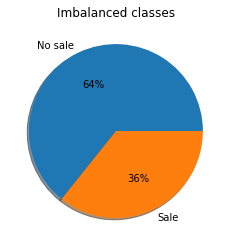

In [9]:
#create pie chart
plt.pie(counts, labels = ["No sale", "Sale"],  shadow= True, autopct='%.0f%%')
plt.title("Imbalanced classes")
plt.show()

In [18]:
import plotly.express as px

fig=px.pie(df,names='Age',title='Travel Insurance Customer by Age',hole=0.1)
fig

In [19]:
fig.write_html("../images/ins_pie.html")

## Data preprocessing

In [83]:
df_binary_encoded = pd.get_dummies(df)

In [84]:
# Drop unecessary columns
cleaned_df = df_binary_encoded.drop(["Employment Type_Private Sector/Self Employed","GraduateOrNot_No","FrequentFlyer_No","EverTravelledAbroad_No"], axis = 1)
cleaned_df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,1,0,0
1,31,1250000,7,0,0,0,1,0,0
2,34,500000,4,1,1,0,1,0,0
3,28,700000,3,1,0,0,1,0,0
4,28,700000,8,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,1,1
1983,28,1750000,5,1,0,0,1,0,1
1984,28,1150000,6,1,0,0,1,0,0
1985,34,1000000,6,0,1,0,1,1,1


In [85]:
X = cleaned_df.drop(["TravelInsurance"], axis = 1)
y = cleaned_df["TravelInsurance"]

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Tuning and trainning model

k: 1, Train/Test Score: 0.915/0.744
k: 3, Train/Test Score: 0.870/0.793
k: 5, Train/Test Score: 0.845/0.817
k: 7, Train/Test Score: 0.833/0.829
k: 9, Train/Test Score: 0.828/0.821
k: 11, Train/Test Score: 0.822/0.815
k: 13, Train/Test Score: 0.815/0.815
k: 15, Train/Test Score: 0.813/0.805
k: 17, Train/Test Score: 0.809/0.805
k: 19, Train/Test Score: 0.806/0.799


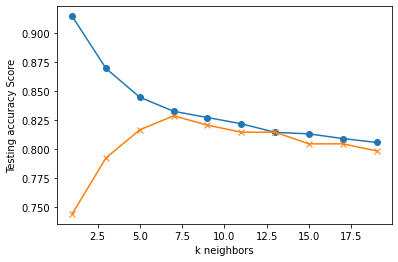

In [87]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Validate model

In [88]:
# select optimal k
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
predictions = knn.predict(X_test)

# summary report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                    target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.81      0.96      0.88       321
         Yes       0.88      0.60      0.71       176

    accuracy                           0.83       497
   macro avg       0.85      0.78      0.80       497
weighted avg       0.84      0.83      0.82       497



## Saving model

In [90]:
# Create pickle file
file = open('../models/KNNmodel_travel_insurance_prediction', 'wb') 

# Save the trained model to file
import pickle
pickle.dump(knn, file)
file.close()


## Prediction

In [91]:
# load the model from disk using pickle
loaded_model = pickle.load(open('../models/KNNmodel_travel_insurance_prediction', 'rb'))

In [92]:
# setup questions for user input
feature_names = X.columns
feature_names

Index(['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases',
       'Employment Type_Government Sector', 'GraduateOrNot_Yes',
       'FrequentFlyer_Yes', 'EverTravelledAbroad_Yes'],
      dtype='object')

### 1. Select an item from X_test to check model accuracy

In [93]:
X_test.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
212,28,750000,5,1,0,1,0,0
1517,26,1400000,4,1,0,1,0,1
785,29,1200000,7,0,0,1,0,1
1175,33,400000,4,1,1,1,0,0
1760,34,1500000,3,0,0,1,1,1


In [94]:
y_test.head()

212     0
1517    1
785     0
1175    0
1760    1
Name: TravelInsurance, dtype: int64

In [95]:
test_individual = X_test.iloc[[1],:]
test_individual

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
1517,26,1400000,4,1,0,1,0,1


In [96]:
loaded_model.predict(test_individual)

array([1], dtype=int64)

### 2. Set a standard user input

In [97]:
sample_user_input = {
    'Age':26, 
    'AnnualIncome':1400000,
    'FamilyMembers':4,
    'ChronicDiseases':"Yes",
    'Employment Type':"Private Sector/Self Employed",
    'GraduateOrNot': "Yes",
    'FrequentFlyer': "No",
    'EverTravelledAbroad': "Yes"
    }
# Note: Employment Type two choices:
    #   1."Government Sector"
    #   2."Private Sector/Self Employed"

In [98]:
# setup required user input 
converted_user_input = dict.fromkeys(feature_names)
converted_user_input

{'Age': None,
 'AnnualIncome': None,
 'FamilyMembers': None,
 'ChronicDiseases': None,
 'Employment Type_Government Sector': None,
 'GraduateOrNot_Yes': None,
 'FrequentFlyer_Yes': None,
 'EverTravelledAbroad_Yes': None}

### 3. Convert sample input to usable type

In [99]:
converted_user_input["Age"] = sample_user_input["Age"]
converted_user_input["AnnualIncome"] = sample_user_input["AnnualIncome"]
converted_user_input["FamilyMembers"] = sample_user_input["FamilyMembers"]

if sample_user_input["ChronicDiseases"] == "Yes":
    converted_user_input["ChronicDiseases"] = 1
else:
    converted_user_input["ChronicDiseases"] = 0

if sample_user_input["GraduateOrNot"] == "Yes":
    converted_user_input["GraduateOrNot_Yes"] = 1
else:
    converted_user_input["GraduateOrNot_Yes"] = 0

if sample_user_input["FrequentFlyer"] == "Yes":
    converted_user_input["FrequentFlyer_Yes"] = 1
else:
    converted_user_input["FrequentFlyer_Yes"] = 0    

if sample_user_input["EverTravelledAbroad"] == "Yes":
    converted_user_input["EverTravelledAbroad_Yes"] = 1
else:
    converted_user_input["EverTravelledAbroad_Yes"] = 0   

if sample_user_input["Employment Type"] == "Government Sector":
    converted_user_input["Employment Type_Government Sector"] = 1
else:
    converted_user_input["Employment Type_Government Sector"] = 0  

converted_user_input

{'Age': 26,
 'AnnualIncome': 1400000,
 'FamilyMembers': 4,
 'ChronicDiseases': 1,
 'Employment Type_Government Sector': 0,
 'GraduateOrNot_Yes': 1,
 'FrequentFlyer_Yes': 0,
 'EverTravelledAbroad_Yes': 1}

In [100]:
input_df = pd.DataFrame(converted_user_input,index=[0])
input_df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,GraduateOrNot_Yes,FrequentFlyer_Yes,EverTravelledAbroad_Yes
0,26,1400000,4,1,0,1,0,1


### 4. Prediction

In [101]:
prediction = loaded_model.predict(input_df)
prediction

array([1], dtype=int64)

In [102]:
if prediction == 0:
    print(f"This customer may NOT buy travel insurance!\n"*5)
else:
    print(f"This customer may buy travel insurance!\n"*5)

This customer may buy travel insurance!
This customer may buy travel insurance!
This customer may buy travel insurance!
This customer may buy travel insurance!
This customer may buy travel insurance!

